In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
columns = ['sex', 'smoker', 'region']
for column in columns:
    values = list(df[column].unique())
    df[column] = df[column].apply(lambda x: values.index(x))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


## Data visualizations 

<Figure size 600x600 with 0 Axes>

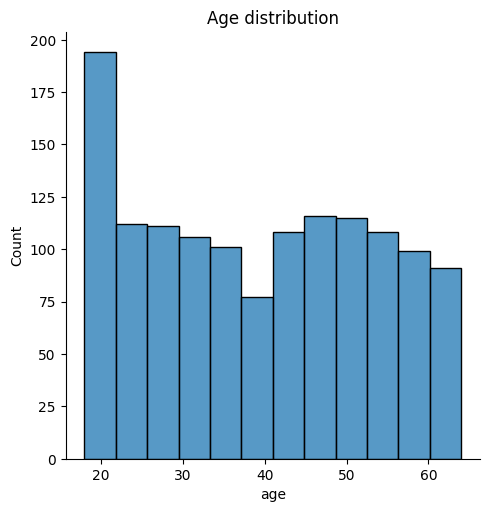

In [6]:
# distribution of age value
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age distribution')
plt.show()

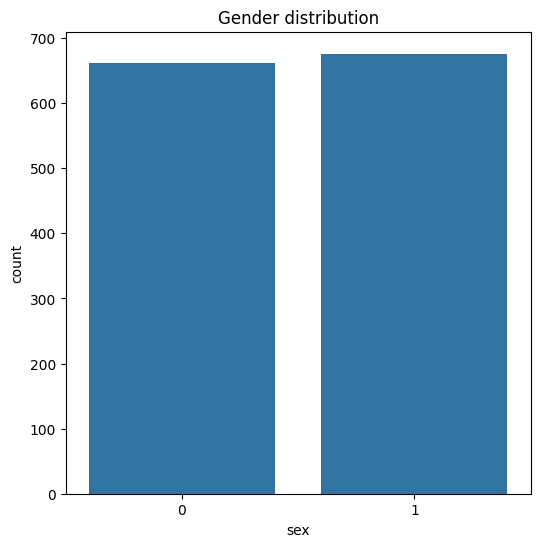

In [7]:
# distribution of gender value
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = df)
plt.title('Gender distribution')
plt.show()

In [8]:
df.sex.value_counts()

sex
1    676
0    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

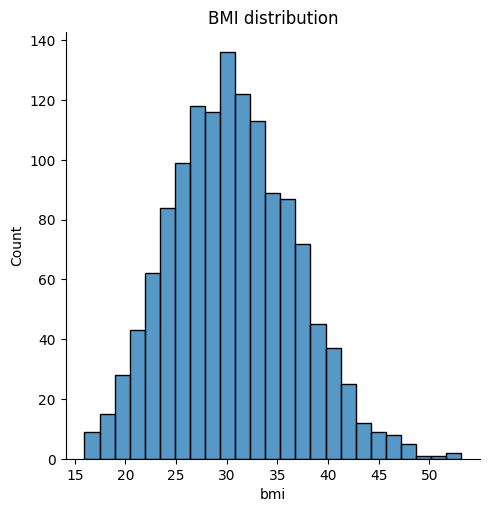

In [9]:
# distribution of bmi value
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI distribution')
plt.show()

## Model Training

In [10]:
X = df.drop('charges', axis = 1)
y = df.charges

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = X.sex, random_state = 2023)

## Using sklearn

In [12]:
model = LinearRegression().fit(X_train, y_train)

In [13]:
train_pred = model.predict(X_train)
print('r squared error: ',metrics.r2_score(y_train, train_pred))
print('mean absolute error: ',metrics.mean_absolute_error(y_train, train_pred))

r squared error:  0.761513573480342
mean absolute error:  4094.3639700572858


In [14]:
test_pred = model.predict(X_test)
print('r squared error: ',metrics.r2_score(y_test, test_pred))
print('mean absolute error: ',metrics.mean_absolute_error(y_test, test_pred))

r squared error:  0.703752330043218
mean absolute error:  4368.3563984556495


In [15]:
input_data = [31,1,25.74,0,1,0]

prediction = model.predict([input_data])
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3442.85522676]
The insurance cost is USD  3442.8552267591476


## Using tensorflow

In [16]:
import tensorflow as tf
import keras
from keras import layers

In [17]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

# Create a model that include the normalization layer
inputs = keras.Input(shape=6)
x = normalizer(inputs)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(400, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(100, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


model.compile(optimizer = 'adam',
             loss = 'mae')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 3ms/step - loss: 13096.4404
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 10095.8125
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 5232.0942
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 3763.5789
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 3396.3999
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 3080.3337
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 2921.8181
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 2776.4287
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 2642.2751
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 2477.9399
Epoch 11/50
34/34 [==============================] - 0s 3ms/step - loss: 2318.1387
Epoch 12/50
34/34 [==============================] - 0s 3ms/step - loss: 2233.0056
Epoch 13/50

In [18]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2198.6536


2198.653564453125